In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy import stats

import dill

rcParams['font.family'] = 'Arial'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.transparent'] = True
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

savefigs = False

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [2]:
with open(DATAFOLDER / "snips_angvel.pickle", "rb") as f:
    snips_vel = dill.load(f)
    
with open(DATAFOLDER / "x_array_forDLC.pickle", "rb") as f:
    x_vel = dill.load(f)

snips_vel.shape

## pre-processing of the DLC angvel snips

# interpolation
df_snips_vel = pd.DataFrame(snips_vel)


df_interpolated = df_snips_vel.interpolate(method='linear', axis=1)
df_filled = df_interpolated.ffill(axis=1).bfill(axis=1)

snips_vel_processed = df_filled.to_numpy()

# find absolute
snips_vel_processed = np.abs(snips_vel_processed)

# zscore
def zscore(x, baseline_points=50):
    """
    Z-score normalization of a 2D array.
    :param x: 2D array
    :param baseline_points: number of points to use for baseline calculation
    :return: z-scored array
    """
    x = np.array(x)
    mean = np.nanmean(x[:, :baseline_points], axis=1)
    std = np.nanstd(x[:, :baseline_points], axis=1)
    print(np.min(std))
    zscored = (x - mean[:, None]) / std[:, None]
    return zscored

# snips_vel_processed = zscore(snips_vel_processed, baseline_points=50)

# how about instead of zscoring, we just adjust to baseline subtraction
baseline = np.nanmean(snips_vel_processed[:, :50], axis=1)
snips_vel_processed = snips_vel_processed - baseline[:, None]

print(np.sum(np.isnan(snips_vel_processed)))
snips_vel = np.array(snips_vel_processed)

# removing NaNs
rows_with_nans_mask = np.isnan(snips_vel).any(axis=1)
snips_vel = snips_vel[~rows_with_nans_mask]
x_vel = x_vel[~rows_with_nans_mask].reset_index(drop=True)
print(snips_vel.shape)
x_vel.shape

0
(1960, 200)


(1960, 6)

In [46]:
import numpy as np

def smooth_array(arr, window_size=5):
    """
    Smooth a 2D array along one dimension using a moving average.
    
    :param arr: 2D NumPy array
    :param window_size: Size of the smoothing window
    :return: Smoothed 2D array
    """
    kernel = np.ones(window_size) / window_size
    smoothed = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='same'), axis=1, arr=arr)
    return smoothed

# Example usage
smoothed_snips_vel = smooth_array(snips_vel, window_size=5)

<Axes: >

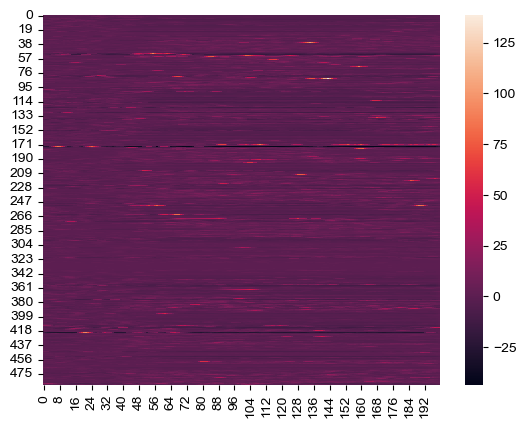

In [50]:
inds = inds = x_vel.query("infusiontype == '45NaCl' & condition == 'deplete'").index
sns.heatmap(smoothed_snips_vel[inds,:])

In [43]:
inds = x_vel.query("id == 'PB31' & condition == 'deplete'").index

In [44]:
a = np.mean(snips_vel[inds,50:150], axis=1)

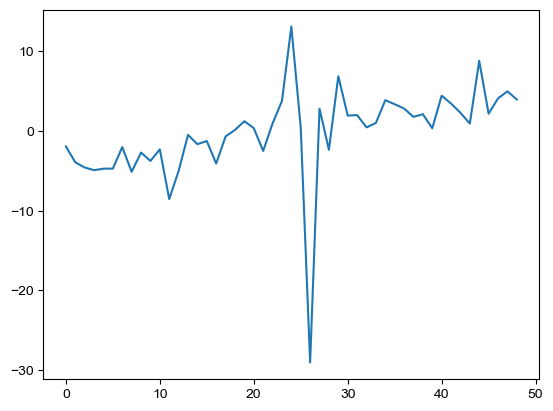

In [45]:
plt.plot(a)